# KNN: An Introduction

## Import common packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import & observe the raw dataset

dataset source: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [2]:
df = pd.DataFrame(pd.read_csv('sample_data/houses_to_rent_v2.csv'))
display(df.head())
display(df.columns)
display(df.shape)

# Observe the proportion of each class in the dataset
display(100 * (df.groupby('city').count() / int(len(df.city))))

# Observe the count for each class in the dataset
display(df.groupby('city').count()) 

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

(10692, 13)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,,,,
Belo Horizonte,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806,11.765806
Campinas,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927,7.977927
Porto Alegre,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875,11.157875
Rio de Janeiro,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533,14.038533
São Paulo,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858,55.059858


,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,,,,
Belo Horizonte,1258,1258,1258,1258,1258,1258,1258,1258,1258,1258,1258,1258
Campinas,853,853,853,853,853,853,853,853,853,853,853,853
Porto Alegre,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193
Rio de Janeiro,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
São Paulo,5887,5887,5887,5887,5887,5887,5887,5887,5887,5887,5887,5887


## Wrangle the dataset

In [3]:
# Assign a unique integer for each label (city)
df.city = pd.factorize(df['city'])[0] 

# Convert boolean strings to 1 and 0
df.animal = pd.Series(np.where(df.animal == 'acept', 1, 0))
df.furniture = pd.Series(np.where(df.furniture == 'furnished', 1, 0))

# Fix inconsistency in column and convert the field to a numeric type
df.floor = df[df.floor == '-'] = 0
df.floor = pd.to_numeric(df.floor)

/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [4]:
# split our dataset between attributes and labels.

X = df.iloc[:, 1:-1].values # Excludes 'city' & 'total(R$)'
y = df.iloc[:, 0].values # Includes 'city' only

In [5]:
display(df.head())
df.dtypes

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,70,2,1,1,0,1,1,2065,3300,211,42,5618
1,0,320,4,4,0,0,1,0,1200,4960,1750,63,7973
2,1,80,1,1,1,0,1,0,1000,2800,0,41,3841
3,1,51,2,1,0,0,1,0,270,1112,22,17,1421
4,0,25,1,1,0,0,0,0,0,800,25,11,836


city                   int64
area                   int64
rooms                  int64
bathroom               int64
parking spaces         int64
floor                  int64
animal                 int64
furniture              int64
hoa (R$)               int64
rent amount (R$)       int64
property tax (R$)      int64
fire insurance (R$)    int64
total (R$)             int64
dtype: object

## Scaling the dataset 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scale and transform before splitting into training/testing

X = scaler.fit_transform(X)

## Split the dataset into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

# The test size is set to 20% of the whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

print(X_train.shape, X_test.shape)

(8553, 11) (2139, 11)


## Run the Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Create an instance
knn = KNeighborsClassifier(n_neighbors=6)

# Train the algorithm
model=knn.fit(X_train, y_train)

# Predict the classes on the testing set
y_pred = model.predict(X_test)

# Get the accuracy score on the testing set
print(metrics.accuracy_score(y_test, y_pred))

0.6161757830762038


## Look at the classification report

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # Precision should be large, but recall should be "smaller"

              precision    recall  f1-score   support

           0       0.68      0.87      0.76      1198
           1       0.55      0.41      0.47       238
           2       0.45      0.28      0.35       299
           3       0.38      0.25      0.30       159
           4       0.40      0.20      0.27       245

    accuracy                           0.62      2139
   macro avg       0.49      0.40      0.43      2139
weighted avg       0.58      0.62      0.58      2139



## Run the model over a range of K

In [10]:
#Choose how many neighbors to test
k_range = range(1,300)

#Create a list to store scores
scores=[]
error = []

#Run the KNN
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred)) # Append the accuracy score
    error.append(np.mean(y_pred != y_test)) # Append the error rate

#Print the scores
print(scores)

[0.5885928003740065, 0.6194483403459561, 0.6068256194483403, 0.6115007012622721, 0.6091631603553063, 0.6161757830762038, 0.6119682094436653, 0.6231884057971014, 0.6147732585320244, 0.6152407667134174, 0.6161757830762038, 0.6157082748948106, 0.6105656848994857, 0.6110331930808789, 0.605890603085554, 0.6133707339878448, 0.6115007012622721, 0.6105656848994857, 0.6077606358111267, 0.6044880785413744, 0.5993454885460495, 0.6044880785413744, 0.603085553997195, 0.6040205703599812, 0.6044880785413744, 0.6068256194483403, 0.6016830294530154, 0.6012155212716223, 0.6012155212716223, 0.6021505376344086, 0.6054230949041608, 0.6026180458158018, 0.6012155212716223, 0.5993454885460495, 0.5965404394576905, 0.5960729312762973, 0.5974754558204769, 0.5970079476390837, 0.5970079476390837, 0.5984104721832632, 0.5988779803646563, 0.5979429640018701, 0.5965404394576905, 0.5988779803646563, 0.5998129967274427, 0.5998129967274427, 0.5984104721832632, 0.5965404394576905, 0.595137914913511, 0.5956054230949042, 0.

## Plot the Accuracy result over instances of K

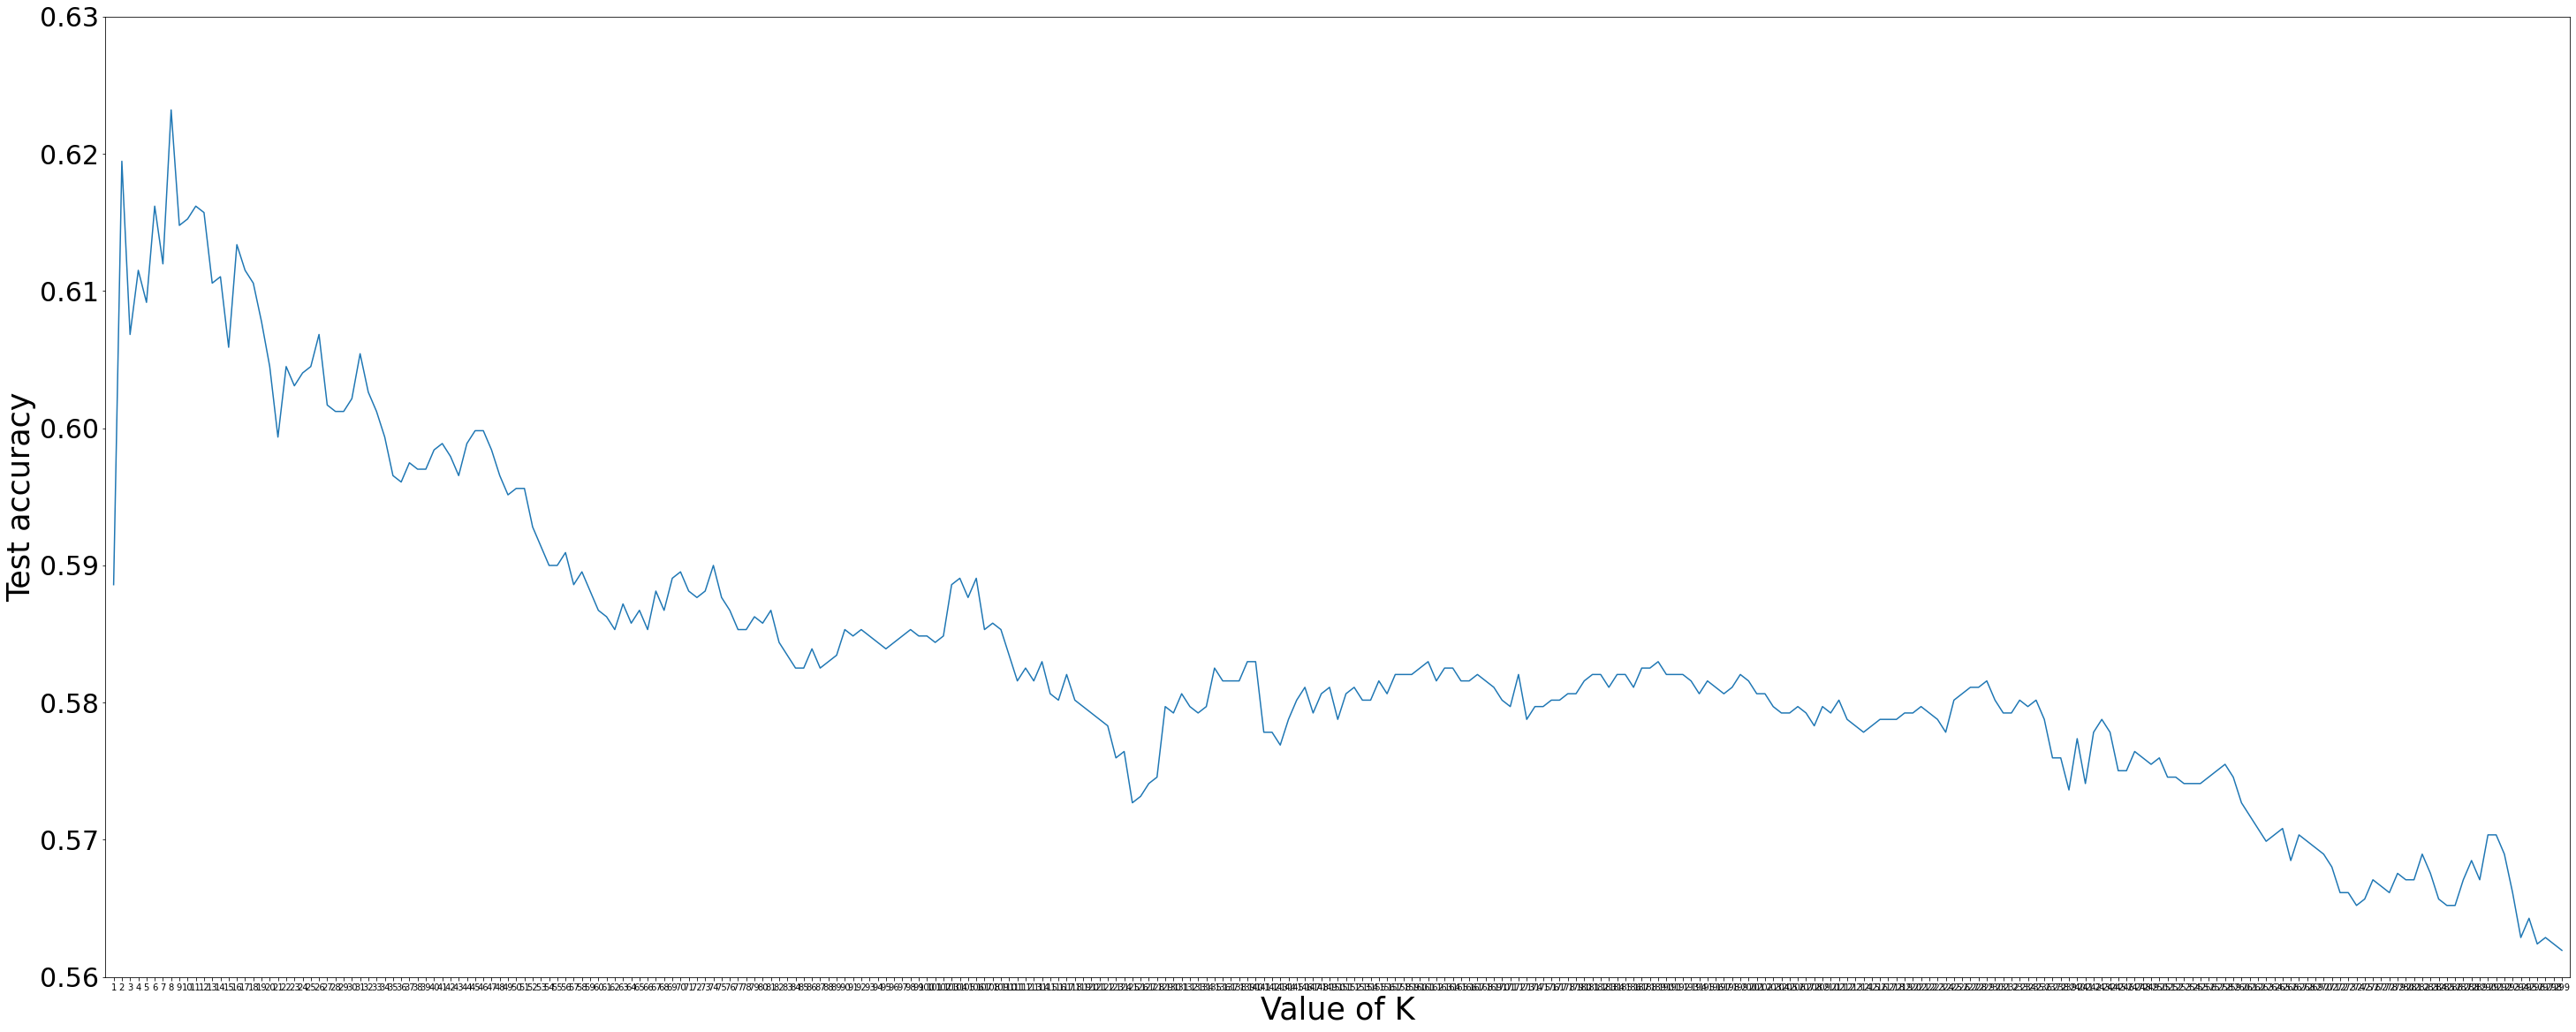

In [15]:
plt.figure(figsize=(50,20))

plt.plot(k_range, scores)
plt.axis([1,25,min(scores),1])
plt.xticks(k_range)
plt.yticks(fontsize=30)
plt.xlabel('Value of K',fontsize=35)
plt.ylabel('Test accuracy',fontsize=35)
plt.xlim(0, 300, 10)
plt.ylim(0.56, .63)
plt.show()

## Plot the error rate over instances of K

Text(0, 0.5, 'Mean Error')

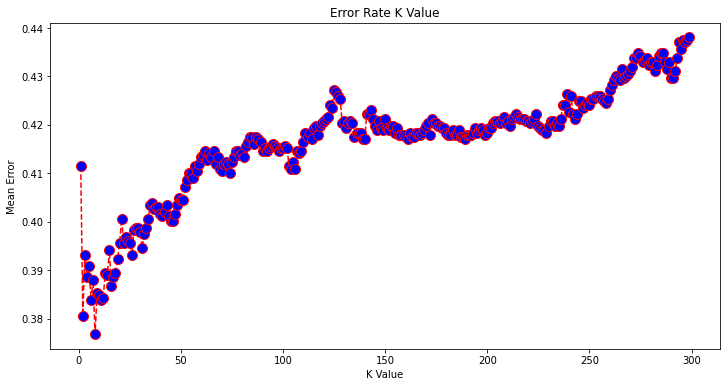

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 300), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Suggestion: Test for Class Imbalance

Compare the model's performance between one single label for the predominating class (i.e. city = 'Sao Paulo') versus all other classes minus the majority class.

## Boilerplate wrangling

In [17]:
df = pd.DataFrame(pd.read_csv('sample_data/houses_to_rent_v2.csv'))

df.animal = pd.Series(np.where(df.animal == 'acept', 1, 0))
df.furniture = pd.Series(np.where(df.furniture == 'furnished', 1, 0))
df.floor = df[df.floor == '-'] = 0
df.floor = pd.to_numeric(df.floor)

/home/hp-nunes/anaconda3/envs/TEST/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [18]:
df.city = pd.Series(np.where(df.city == 'São Paulo',1,0))

# # split our dataset into its attributes and labels.
X = df.iloc[:, 1:-1].values # Excludes 'city'
y = df.iloc[:, 0].values # Includes 'city' only

In [19]:
from sklearn.preprocessing import StandardScaler # Scale and transform before splitting into training/testing

scaler = StandardScaler()
X = scaler.fit_transform(X)

## Test on Majority class label

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)
print(X_train.shape, X_test.shape)

(8553, 11) (2139, 11)


In [21]:
#Create an instance
knn = KNeighborsClassifier(n_neighbors=6)
#Train the algorithm
model=knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.68630201028518


In [22]:
#Choose how many neighbors to test
k_range = range(1,300)

#Create a list to store scores
scores=[]
error = []

#Run the KNN
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred)) # Append the accuracy score
    error.append(np.mean(y_pred != y_test)) # Append the error rate

#Print the scores
print(scores)

[0.689107059373539, 0.6418887330528285, 0.6834969611968209, 0.6708742402992053, 0.7017297802711547, 0.68630201028518, 0.7073398784478728, 0.6947171575502571, 0.7101449275362319, 0.7003272557269752, 0.7031323048153343, 0.6937821411874708, 0.6975222066386162, 0.697054698457223, 0.697054698457223, 0.6919121084618981, 0.6984572230014026, 0.6956521739130435, 0.6965871902758298, 0.6993922393641889, 0.6919121084618981, 0.6965871902758298, 0.6993922393641889, 0.6993922393641889, 0.6993922393641889, 0.6989247311827957, 0.6984572230014026, 0.7017297802711547, 0.7012622720897616, 0.6961196820944366, 0.6965871902758298, 0.6984572230014026, 0.6965871902758298, 0.7012622720897616, 0.6975222066386162, 0.6956521739130435, 0.6951846657316503, 0.6942496493688639, 0.6965871902758298, 0.697054698457223, 0.6993922393641889, 0.6984572230014026, 0.7007947639083684, 0.7007947639083684, 0.6989247311827957, 0.697054698457223, 0.6961196820944366, 0.6942496493688639, 0.6923796166432913, 0.6961196820944366, 0.6937

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[479 462]
 [233 965]]
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       941
           1       0.68      0.81      0.74      1198

    accuracy                           0.68      2139
   macro avg       0.67      0.66      0.66      2139
weighted avg       0.67      0.68      0.67      2139



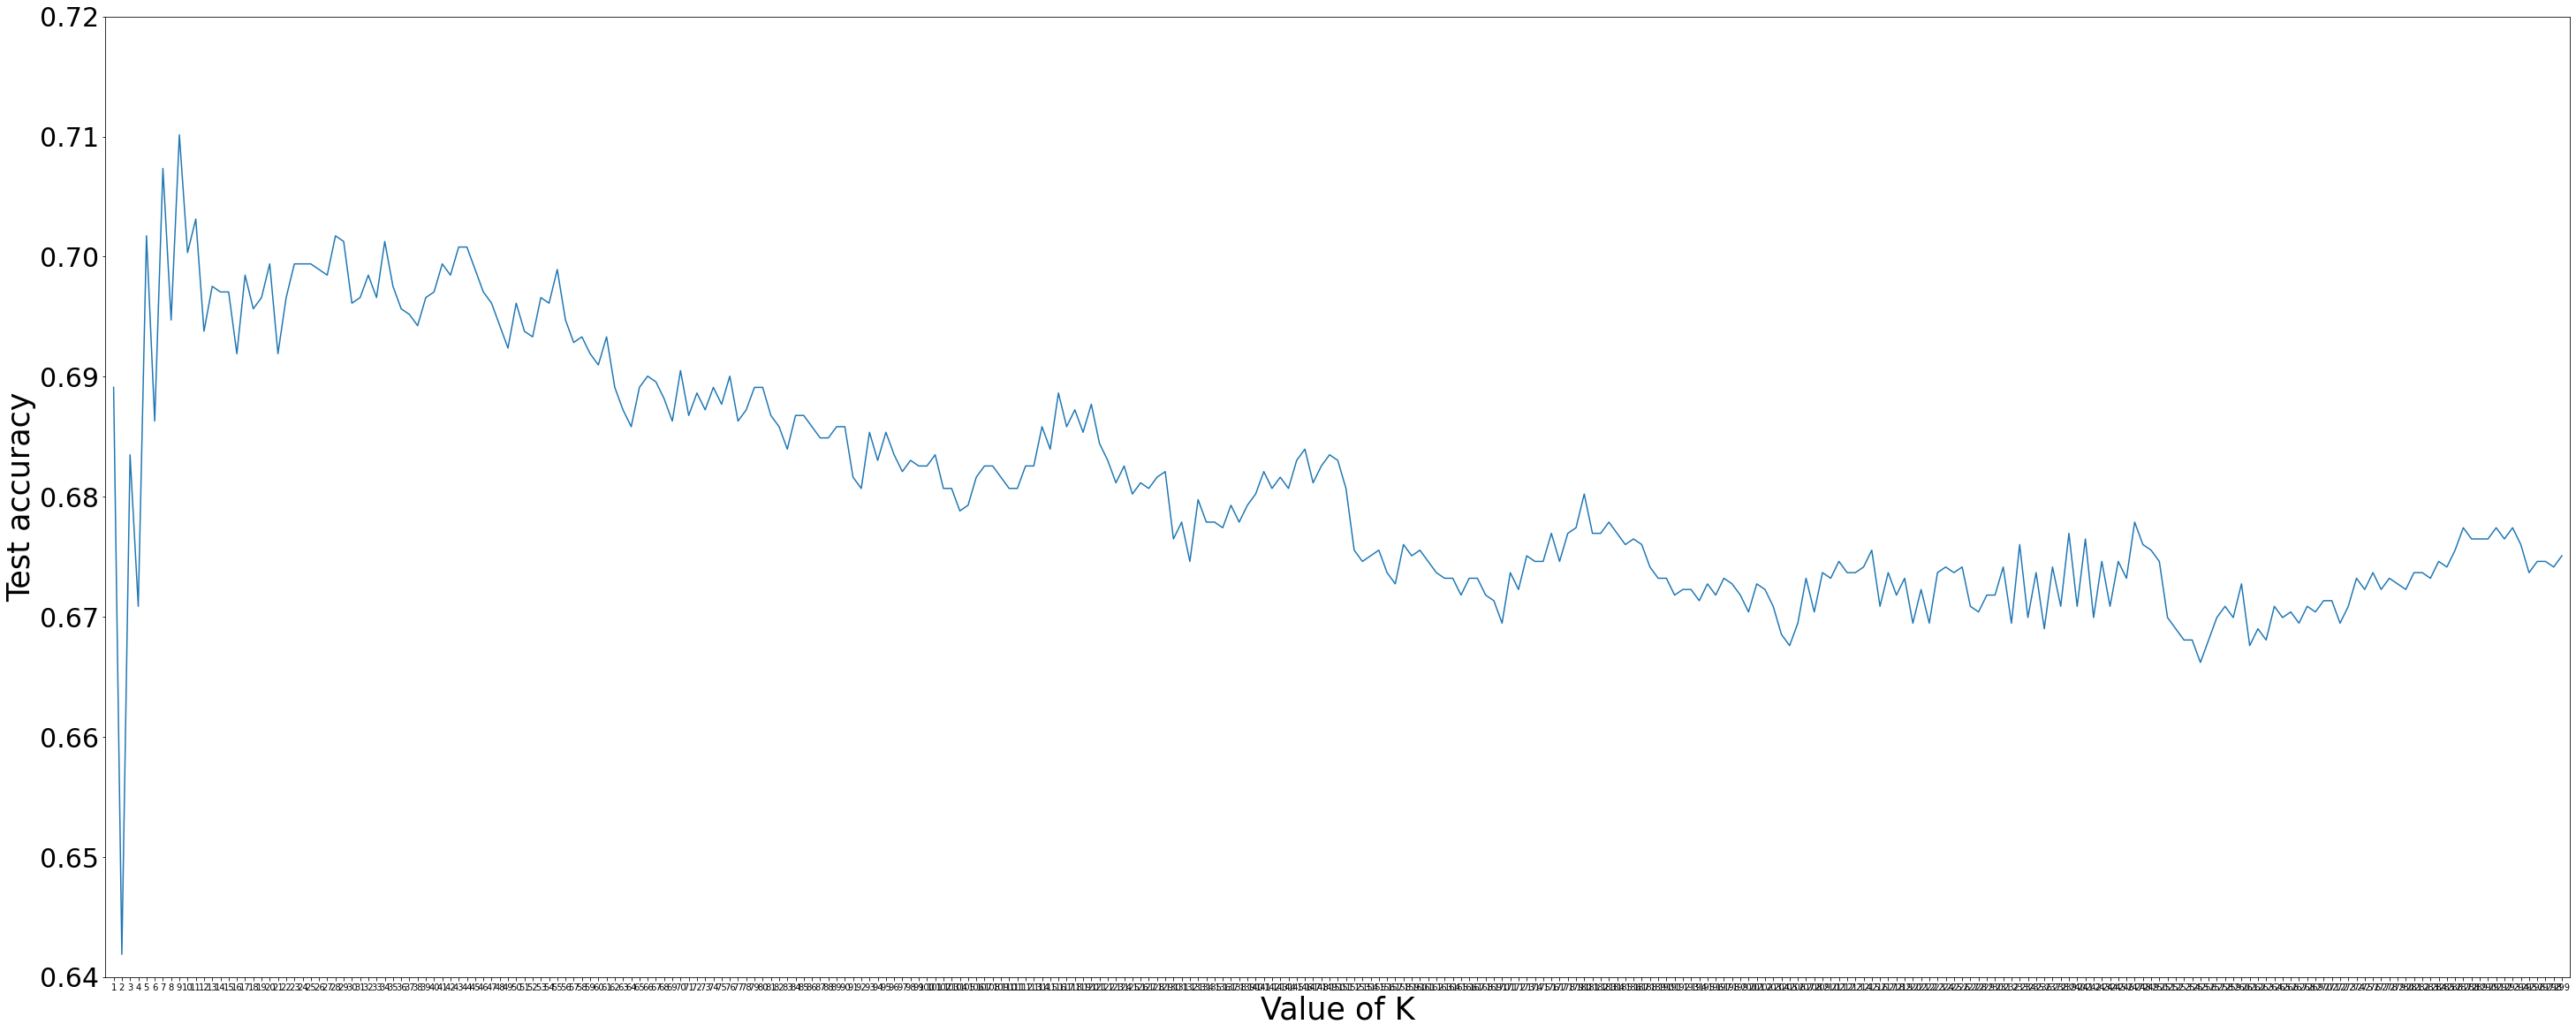

In [24]:
plt.figure(figsize=(50,20))

plt.plot(k_range, scores)
plt.axis([1,25,min(scores),1])
plt.xticks(k_range)
plt.yticks(fontsize=30)
plt.xlabel('Value of K',fontsize=35)
plt.ylabel('Test accuracy',fontsize=35)
plt.xlim(0, 300, 10)
plt.ylim(0.64, .72)
plt.show()

Text(0, 0.5, 'Mean Error')

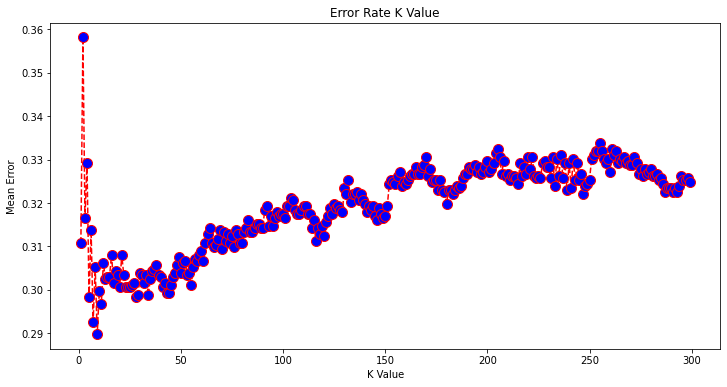

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 300), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Further Reading

* [K-Nearest Neighbors Algorithm in Python and Scikit-Learn](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)
* [KNN visualization in just 13 lines of code](https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6)
* [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)
* [Class Imbalance Problem](http://www.chioka.in/class-imbalance-problem/#:~:text=What%20is%20the%20Class%20Imbalance,class%20of%20data%20(negative).)
* [Classification Report](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)
* [Precision vs Recall](https://towardsdatascience.com/precision-vs-recall-386cf9f89488#:~:text=Precision%20and%20recall%20are%20two,correctly%20classified%20by%20your%20algorithm)
* [How do I interpret the given classification report?](https://datascience.stackexchange.com/questions/57192/how-do-i-interpret-the-given-classification-report)
* [How to interpret classification report of scikit-learn?](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)